In [ ]:
!rm -r /content/sample_data # i hate a lot this folder
path = 'https://drive.google.com/file/d/1jNZz6-e1zgRmGYr1hvF-KgnMDv3L6qIC/view?usp=sharing'
link = path.split('/')
download = f'https://drive.google.com/uc?id={link[-2]}'
!gdown '{download}'

Downloading...
From: https://drive.google.com/uc?id=1jNZz6-e1zgRmGYr1hvF-KgnMDv3L6qIC
To: /content/flowersDS.zip
100% 229M/229M [00:02<00:00, 82.6MB/s]


In [ ]:
%%capture
!unzip flowersDS.zip

In [ ]:
%%capture
#!pip install datasets
!pip install transformers==4.17.0
!pip install einops==0.4.1
!pip install timm 
!pip install wandb -q

In [ ]:
#from torchvision import datasets, models, transforms
import os
import numpy as np # linear algebra
import torch
import torchvision
from torchvision import datasets
from torch.utils.data import DataLoader
#from datasets import load_dataset, Image
from transformers import DeiTFeatureExtractor
from tqdm import tqdm
import matplotlib.pyplot as plt
import timm
from timm.loss import LabelSmoothingCrossEntropy
import sys
import wandb

In [ ]:
dataset_path = "./flowers/data/"

In [ ]:
def get_classes(data_dir):
    all_data = datasets.ImageFolder(data_dir)
    return all_data.classes

In [ ]:
feature_extractor = DeiTFeatureExtractor.from_pretrained("facebook/deit-tiny-patch16-224")
feature_extractor

Downloading:   0%|          | 0.00/160 [00:00<?, ?B/s]

DeiTFeatureExtractor {
  "crop_size": 224,
  "do_center_crop": true,
  "do_normalize": true,
  "do_resize": true,
  "feature_extractor_type": "DeiTFeatureExtractor",
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 3,
  "size": 224
}

In [ ]:
from torchvision.transforms import (
    CenterCrop,
    Compose,
    Normalize,
    RandomHorizontalFlip,
    RandomResizedCrop,
    Resize,
    ToTensor,
)

normalize = Normalize(mean=feature_extractor.image_mean, std=feature_extractor.image_std)
train_transforms = Compose(
        [
            RandomResizedCrop(feature_extractor.size),
            RandomHorizontalFlip(),
            ToTensor(),
            normalize,
        ]
    )

val_transforms = Compose(
        [
            Resize(feature_extractor.size),
            CenterCrop(feature_extractor.size),
            ToTensor(),
            normalize,
        ]
    )

In [36]:
batch_size = 128
batch_size_test = 32

train_data = datasets.ImageFolder(os.path.join(dataset_path, "train/"), transform = train_transforms)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2)

test_data = datasets.ImageFolder(os.path.join(dataset_path, "test/"), transform = val_transforms)
test_loader = DataLoader(train_data, batch_size=batch_size_test, shuffle=False, num_workers=2)

val_data = datasets.ImageFolder(os.path.join(dataset_path, "valid/"), transform = val_transforms)
val_loader = DataLoader(train_data, batch_size=batch_size_test, shuffle=False, num_workers=2)

In [37]:
imgs, labels = next(iter(train_loader))

In [38]:
f'{imgs[0].shape}  label : {labels[0].item()}'

'torch.Size([3, 224, 224])  label : 0'

In [39]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.5, 0.5, 0.5])
    std = np.array([0.5, 0.5, 0.5])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    plt.axis('off')
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated

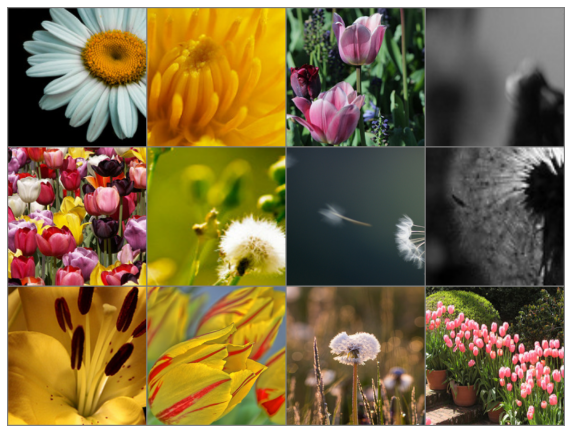

In [40]:
images, names = [],[]
plt.subplots(figsize=(10, 10))
for i  in range(12):
  index = torch.randint(len(imgs), (1,)).item()
  inp = imgs[index]
  name = labels[index]
  images.append(inp)
  names.append(name)
out = torchvision.utils.make_grid(images, nrow =4 )
#imshow(out, title=[labels[x] for x in name])
imshow(out)

In [ ]:
# now, for the model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

In [ ]:
classes = get_classes("./flowers/data/train")
print(classes, len(classes))

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'] 5


In [ ]:
!git clone https://github.com/TiagoFilipeSousaGoncalves/survey-attention-medical-imaging.git

Cloning into 'survey-attention-medical-imaging'...
remote: Enumerating objects: 1971, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 1971 (delta 43), reused 46 (delta 21), pack-reused 1886
Receiving objects: 100% (1971/1971), 728.30 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (1381/1381), done.


In [ ]:
%cd survey-attention-medical-imaging/code

/content/survey-attention-medical-imaging/code


In [ ]:
from transformer_explainability_utils.ViT_LRP import deit_tiny_patch16_224 as DeiT_Tiny
from transformer_explainability_utils.ViT_explanation_generator import LRP

In [41]:
# Number of classes for models
nr_classes = len(classes)
IMG_SIZE = feature_extractor.size

model = DeiT_Tiny(pretrained=True, num_classes=nr_classes , input_size=(3, IMG_SIZE, IMG_SIZE), url="https://dl.fbaipublicfiles.com/deit/deit_tiny_patch16_224-a1311bcf.pth")
attribution_generator = LRP(model, device)

Model loaded with success.


In [42]:
model.eval
model = model.to(device)

In [ ]:
%cd /content

/content


In [ ]:
#@title LogIn Wandb
# WandB – Login to your wandb account so you can log all your metrics
!wandb login

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


In [43]:
learning_rate = 0.03
scheduler_step = 9
scheduler_gamma = 0.88
optimizer = torch.optim.Adam(model.head.parameters(), lr=learning_rate)
criterion = LabelSmoothingCrossEntropy() 
exp_lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=scheduler_step, gamma=scheduler_gamma)
def fit(model, train, test , epochs=10):
    model.to(device)

    for epoch in range(1, epochs+1):
        model.train()
        train_loss, train_acc = [], []
        bar = tqdm(train)
        for batch in bar:
            X, y = batch
            X, y = X.to(device), y.to(device)
            optimizer.zero_grad()
            y_hat = model(X)
            loss = criterion(y_hat, y)
            loss.backward()
            optimizer.step()
            train_loss.append(loss.item())
            acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
            train_acc.append(acc)
            exp_lr_scheduler.step()
            bar.set_description(f"loss  {np.mean(train_loss):.5f}    acc  {np.mean(train_acc):.5f}   ")
        bar = tqdm(test_loader)
        val_loss, val_acc = [], []
        model.eval()
        with torch.no_grad():
            for batch in bar:
                X, y = batch
                X, y = X.to(device), y.to(device)
                y_hat = model(X)
                loss = criterion(y_hat, y)
                val_loss.append(loss.item())
                acc = (y == torch.argmax(y_hat, axis=1)).sum().item() / len(y)
                val_acc.append(acc)
                bar.set_description(f"val_loss {np.mean(val_loss):.5f} val_acc {np.mean(val_acc):.5f}")

        wandb.log({'Val accuracy': np.mean(val_acc), 'val loss': np.mean(val_loss)})
        print(f"\nEpoch {epoch}/{epochs} loss {np.mean(train_loss):.5f} val_loss {np.mean(val_loss):.5f} acc {np.mean(train_acc):.5f} val_acc {np.mean(val_acc):.5f}\n")

In [44]:
wandb.init( project="deit_tiny_patch16_224__flowers")

config = wandb.config          
config.batch_size = batch_size          
config.test_batch_size = batch_size    
config.epochs = 10              
config.lr = learning_rate
config.scheduler_step =scheduler_step
config.scheduler_gamma =scheduler_gamma    

fit(model, train_loader, test_loader)

Val accuracy,▁▄▇▆▇█████
val loss,█▃▂▂▂▂▁▁▁▁
Val accuracy,0.89013
val loss,0.66552


val_loss 0.87796 val_acc 0.81395: 100%|██████████| 92/92 [00:13<00:00,  7.07it/s]



Epoch 1/10 loss 1.09899 val_loss 0.87796 acc 0.74784 val_acc 0.81395



val_loss 0.73169 val_acc 0.86453: 100%|██████████| 92/92 [00:14<00:00,  6.18it/s]



Epoch 2/10 loss 0.80470 val_loss 0.73169 acc 0.82829 val_acc 0.86453



val_loss 0.70333 val_acc 0.87917: 100%|██████████| 92/92 [00:14<00:00,  6.16it/s]



Epoch 3/10 loss 0.72541 val_loss 0.70333 acc 0.86701 val_acc 0.87917



val_loss 0.69865 val_acc 0.87577: 100%|██████████| 92/92 [00:13<00:00,  6.94it/s]



Epoch 4/10 loss 0.69671 val_loss 0.69865 acc 0.87862 val_acc 0.87577



val_loss 0.68902 val_acc 0.88155: 100%|██████████| 92/92 [00:14<00:00,  6.16it/s]



Epoch 5/10 loss 0.70093 val_loss 0.68902 acc 0.87049 val_acc 0.88155



val_loss 0.67079 val_acc 0.89427: 100%|██████████| 92/92 [00:13<00:00,  6.99it/s]



Epoch 6/10 loss 0.69345 val_loss 0.67079 acc 0.87553 val_acc 0.89427



val_loss 0.66803 val_acc 0.89594: 100%|██████████| 92/92 [00:12<00:00,  7.14it/s]



Epoch 7/10 loss 0.67796 val_loss 0.66803 acc 0.88550 val_acc 0.89594



val_loss 0.66797 val_acc 0.88970: 100%|██████████| 92/92 [00:14<00:00,  6.48it/s]



Epoch 8/10 loss 0.67727 val_loss 0.66797 acc 0.88439 val_acc 0.88970



val_loss 0.65884 val_acc 0.89458: 100%|██████████| 92/92 [00:16<00:00,  5.47it/s]



Epoch 9/10 loss 0.67289 val_loss 0.65884 acc 0.88617 val_acc 0.89458



val_loss 0.65557 val_acc 0.89631: 100%|██████████| 92/92 [00:12<00:00,  7.10it/s]


Epoch 10/10 loss 0.67330 val_loss 0.65557 acc 0.88439 val_acc 0.89631



In [45]:
test_loss = 0.0
class_correct = list(0 for i in range(len(classes)))
class_total = list(0 for i in range(len(classes)))
model.eval()

for data, target in tqdm(val_loader):
    data, target = data.to(device), target.to(device)
    with torch.no_grad(): # turn off autograd for faster testing
        output = model(data)
        loss = criterion(output, target)
    test_loss = loss.item() * data.size(0)
    _, pred = torch.max(output, 1)
    correct_tensor = pred.eq(target.data.view_as(pred))
    correct = np.squeeze(correct_tensor.cpu().numpy())
    if len(target) == 32:
        for i in range(32):
            label = target.data[i]
            class_correct[label] += correct[i].item()
            class_total[label] += 1

test_loss = test_loss / len(val_loader)
print('Test Loss: {:.4f}'.format(test_loss))
for i in range(len(classes)):
    if class_total[i] > 0:
        print("Test Accuracy of %5s: %2d%% (%2d/%2d)" % (
            classes[i], 100*class_correct[i]/class_total[i], np.sum(class_correct[i]), np.sum(class_total[i])
        ))
    else:
        print("Test accuracy of %5s: NA" % (classes[i]))
print("Test Accuracy of %2d%% (%2d/%2d)" % (
            100*np.sum(class_correct)/np.sum(class_total), np.sum(class_correct), np.sum(class_total)
        ))

100%|██████████| 92/92 [00:12<00:00,  7.29it/s]

Test Loss: 0.2066
Test Accuracy of daisy: 86% (439/506)
Test Accuracy of dandelion: 92% (666/718)
Test Accuracy of roses: 83% (429/512)
Test Accuracy of sunflowers: 89% (500/559)
Test Accuracy of tulips: 85% (529/617)
Test Accuracy of 88% (2563/2912)


In [46]:
#import sys
from torchvision import transforms
from PIL import Image
#import numpy
#import numpy as np
import matplotlib.pyplot as plt
import cv2


#normalize = transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
normalize = transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize,
])

In [47]:
# create heatmap from mask on image
def show_cam_on_image(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    cam = heatmap + np.float32(img)
    cam = cam / np.max(cam)
    return cam

def show_cam_on_image_plus(img, mask):
    heatmap = cv2.applyColorMap(np.uint8(255 * mask), cv2.COLORMAP_JET)
    heatmap = np.float32(heatmap) / 255
    #cam = heatmap + np.float32(img)
    cam = heatmap
    cam = cam / np.max(cam)
    return cam
    
def generate_visualization_plus(original_image, class_index=None , plus=False):
    transformer_attribution = attribution_generator.generate_attribution(original_image.unsqueeze(0).cuda(), method="transformer_attribution", index=class_index).detach()
    transformer_attribution = transformer_attribution.reshape(1, 1, 14, 14)
    transformer_attribution = torch.nn.functional.interpolate(transformer_attribution, scale_factor=16, mode='bilinear')
    transformer_attribution = transformer_attribution.reshape(224, 224).cuda().data.cpu().numpy()
    transformer_attribution = (transformer_attribution - transformer_attribution.min()) / (transformer_attribution.max() - transformer_attribution.min())
    image_transformer_attribution = original_image.permute(1, 2, 0).data.cpu().numpy()
    image_transformer_attribution = (image_transformer_attribution - image_transformer_attribution.min()) / (image_transformer_attribution.max() - image_transformer_attribution.min())
    if plus:
      vis = show_cam_on_image_plus(image_transformer_attribution, transformer_attribution)
    else:
      vis = show_cam_on_image(image_transformer_attribution, transformer_attribution)
    vis =  np.uint8(255 * vis)
    vis = cv2.cvtColor(np.array(vis), cv2.COLOR_RGB2BGR)
    return vis

def print_top_classes(predictions, **kwargs):    
    # Print Top-5 predictions
    prob = torch.softmax(predictions, dim=1)
    class_indices = predictions.data.topk(5, dim=1)[1][0].tolist()
    max_str_len = 0
    class_names = []
    for cls_idx in class_indices:
        class_names.append(myClass[cls_idx])
        if len(myClass[cls_idx]) > max_str_len:
            max_str_len = len(myClass[cls_idx])
    
    print('Top 5 classes:')
    for cls_idx in class_indices:
        output_string = '\t{} : {}'.format(cls_idx, myClass[cls_idx])
        output_string += ' ' * (max_str_len - len(myClass[cls_idx])) + '\t\t'
        output_string += 'value = {:.3f}\t prob = {:.1f}%'.format(predictions[0, cls_idx], 100 * prob[0, cls_idx])
        print(output_string)

In [48]:
imagesToDownload = {0: 'https://images.hola.com/imagenes/decoracion/20211013197604/cultivar-tulipanes-plantas-interior-exterior-il/1-6-257/cultivar-tulipanes-04a-a.jpg',
                    1: 'https://elarbol.org/wp-content/uploads/2018/09/word-image-116.jpeg',
                    2: 'https://assets.simpleviewinc.com/simpleview/image/upload/c_limit,h_1200,q_75,w_1200/v1/clients/raleigh/tim_bish_qdccZLaqKOs_unsplash_b8846269-b9dd-4349-b4f0-031e9775442a.jpg',
                    3: 'https://www.jardineriaon.com/wp-content/uploads/2015/10/rosa-te.jpg',
                    4: 'https://st2.depositphotos.com/1001085/5877/i/450/depositphotos_58775193-stock-photo-single-white-rose-isolated-on.jpg',
                    5: 'https://cdn.shopify.com/s/files/1/0488/7855/1202/products/meadow-daisy-seed-s869_3d4d3380-4b8c-4f35-b730-02060660d800_1200x.jpg',
                    6: 'https://britishlocalfood.com/wp-content/uploads/img-dir/dandelion-foraging-1.jpg',
                    7: 'https://images.immediate.co.uk/production/volatile/sites/10/2018/08/2048x1365-Red-tulips-LI2098086-ecb2867.jpg',
                    8: 'https://i.pinimg.com/originals/4c/c7/d7/4cc7d75430296c8b175a3be193e93b2c.jpg',
                    9: 'https://assets.puzzlefactory.pl/puzzle/201/389/original.jpg',
                    10:'https://cdn.shopify.com/s/files/1/2652/9998/products/Delight2021_1024x1024_2x_96f05c35-f204-4f94-9526-ccc10e0e1a8d.png?v=1631543828',                                  
                    11:'https://s3-media0.fl.yelpcdn.com/bphoto/Hr3S2dlUCV8ocT3K402fNg/348s.jpg',
                    12:'https://thumbs.dreamstime.com/b/sunflowers-red-rose-wedding-bouquet-close-up-closeup-detail-yellow-sunflower-red-rose-wedding-flower-arrangement-139595503.jpg',
                    }

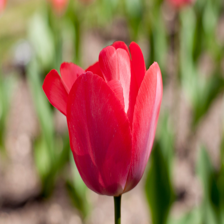

In [84]:
#@title Imágenes a descargar, vea index en `imagesToDownload`:
IndexOffiles = '7' #@param [0,1,2,3,4,5,6,7,8,9,10,11,12] {allow-input: true}
URL = imagesToDownload[int(IndexOffiles)]
import requests
if os.path.exists('image.jpg'):
  os.remove('image.jpg') 
response = requests.get(URL)
open("image.jpg", "wb").write(response.content)
img = Image.open('./image.jpg')
newsize = (224, 224)
im1 = img.resize(newsize)
im1

In [82]:
myClass = {0: 'daisy',
 1: 'dandelion',
 2: 'roses',
 3: 'sunflowers',
 4: 'tulips'
}

Top 5 classes:
	4 : tulips    		value = 7.702	 prob = 99.8%
	2 : roses     		value = 0.882	 prob = 0.1%
	0 : daisy     		value = 0.195	 prob = 0.1%
	1 : dandelion 		value = -0.191	 prob = 0.0%
	3 : sunflowers		value = -1.076	 prob = 0.0%


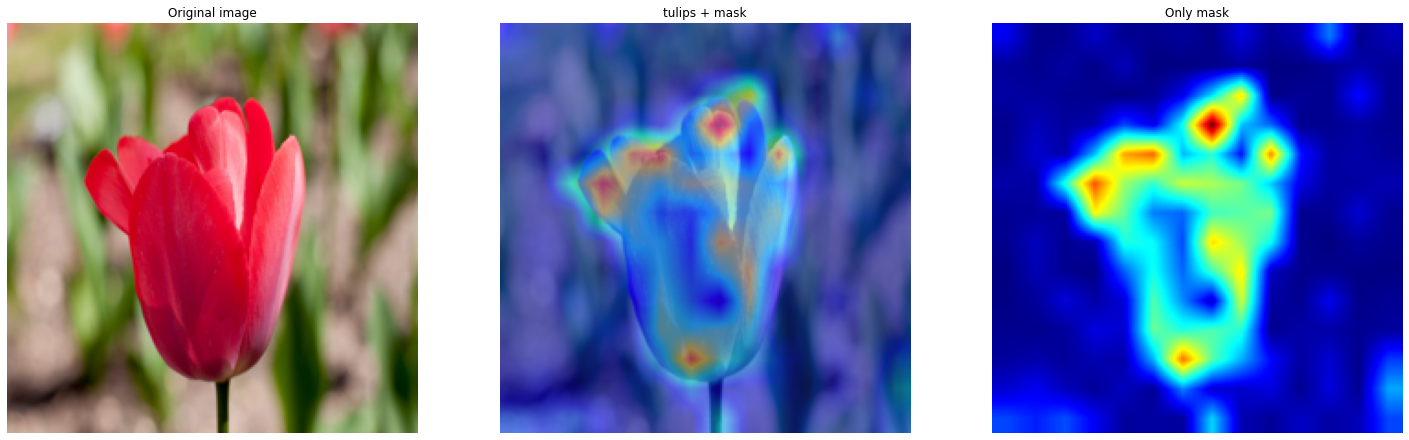

In [85]:
#@title Clases de flores:
chose = 'tulips' #@param ["daisy", "dandelion", "roses", "sunflowers", "tulips"]

index = list(myClass.values()).index(chose)

image = Image.open('image.jpg')
newsize = (224, 224)
im1 = image.resize(newsize)
tusker_zebra_image = transform(image)

output = model(tusker_zebra_image.unsqueeze(0).cuda())


fig, axs = plt.subplots(1, 3, figsize=(25, 25))
axs[0].title.set_text('Original image')
axs[0].imshow(im1);
axs[0].axis('off');

print_top_classes(output)


# zebra 
# zebra- the predicted class
tulips = generate_visualization_plus(tusker_zebra_image, class_index=index)

# generate visualization for class 101: 'tusker'
tusker = generate_visualization_plus(tusker_zebra_image, class_index=index, plus=True)

axs[1].title.set_text(f'{chose} + mask')
axs[1].imshow(tulips);
axs[1].axis('off');
axs[2].imshow(tusker);
axs[2].title.set_text('Only mask')
axs[2].axis('off');